# Import libaries

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 - Exploratory data analysis

## Load data

In [2]:
timestamps = pd.read_json(r"C:\Users\Sheng Miao\OneDrive\桌面\SpringBoard\Springboard_MyProjects\Take_home_challenge\ultimate_challenge\logins.json")

## Initial exploration

In [3]:
timestamps.shape

(93142, 1)

In [4]:
timestamps.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
timestamps.isnull().sum()

login_time    0
dtype: int64

In [6]:
timestamps['login_time'] = pd.to_datetime(timestamps['login_time'])
timestamps = timestamps.sort_values(by='login_time', ascending=True, ignore_index=True)
timestamps.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [7]:
timestamps.tail()

,login_time
93137,1970-04-13 18:48:52
93138,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93140,1970-04-13 18:54:23
93141,1970-04-13 18:57:38


In [8]:
timestamps['dur_last'] = timestamps['login_time'] - timestamps['login_time'].shift(1)
timestamps['dur_start'] = timestamps['login_time'] - timestamps['login_time'].iloc[0]

In [9]:
timestamps.head()

,login_time,dur_last,dur_start
0,1970-01-01 20:12:16,NaT,0 days 00:00:00
1,1970-01-01 20:13:18,0 days 00:01:02,0 days 00:01:02
2,1970-01-01 20:16:10,0 days 00:02:52,0 days 00:03:54
3,1970-01-01 20:16:36,0 days 00:00:26,0 days 00:04:20
4,1970-01-01 20:16:37,0 days 00:00:01,0 days 00:04:21


In [10]:
# Ensure dur_start is a timedelta
timestamps['dur_start'] = pd.to_timedelta(timestamps['dur_start'])

# Convert to minutes
timestamps['minutes_from_start'] = timestamps['dur_start'].dt.total_seconds() / 60

# Bin into 15-minute intervals (e.g., 0–15, 15–30, etc.)
timestamps['interval_bin'] = (timestamps['minutes_from_start'] // 15).astype(int)

# Count logins per interval
login_counts = timestamps.groupby('interval_bin').size()

In [11]:
timestamps.head()

,login_time,dur_last,dur_start,minutes_from_start,interval_bin
0,1970-01-01 20:12:16,NaT,0 days 00:00:00,0.000000,0
1,1970-01-01 20:13:18,0 days 00:01:02,0 days 00:01:02,1.033333,0
2,1970-01-01 20:16:10,0 days 00:02:52,0 days 00:03:54,3.900000,0
3,1970-01-01 20:16:36,0 days 00:00:26,0 days 00:04:20,4.333333,0
4,1970-01-01 20:16:37,0 days 00:00:01,0 days 00:04:21,4.350000,0


In [12]:
timestamps.tail()

,login_time,dur_last,dur_start,minutes_from_start,interval_bin
93137,1970-04-13 18:48:52,0 days 00:02:46,101 days 22:36:36,146796.600000,9786
93138,1970-04-13 18:50:19,0 days 00:01:27,101 days 22:38:03,146798.050000,9786
93139,1970-04-13 18:54:02,0 days 00:03:43,101 days 22:41:46,146801.766667,9786
93140,1970-04-13 18:54:23,0 days 00:00:21,101 days 22:42:07,146802.116667,9786
93141,1970-04-13 18:57:38,0 days 00:03:15,101 days 22:45:22,146805.366667,9787


In [13]:
print(login_counts)

interval_bin
0       8
1       8
2       6
3       3
4       3
       ..
9783    4
9784    4
9785    5
9786    7
9787    1
Length: 9391, dtype: int64


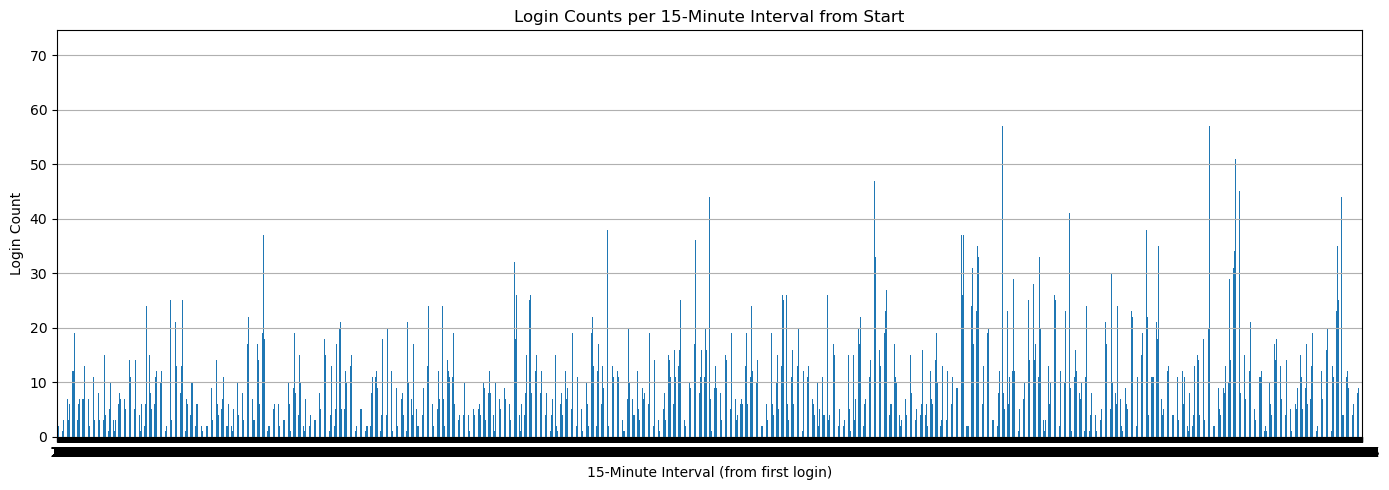

In [14]:
# Plot
plt.figure(figsize=(14, 5))
login_counts.plot(kind='bar')
plt.title('Login Counts per 15-Minute Interval from Start')
plt.xlabel('15-Minute Interval (from first login)')
plt.ylabel('Login Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Data Quality and Cleaning

Spikes May Indicate Data Duplication or Bot Activity, Some spikes (e.g., >70 logins in a 15-min window) could reflect Real-world events (e.g., class sessions) or Automated logins or duplicate rows. To diagonostic:

The interval numbers on the x-axis are unreadable due to the large number of bins and default tick labeling. Binning by dur_start is ideal for studying relative usage patterns, but it hides time-of-day or weekday effects. 

In [15]:
print(len(timestamps))

93142


In [16]:
timestamps['login_time'].duplicated().sum()

877

In [17]:
timestamps.groupby('login_time').size().describe()

count    92265.000000
mean         1.009505
std          0.098031
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
dtype: float64

In [18]:
duplicates = timestamps[timestamps.duplicated(subset=['login_time'], keep=False)] # keep=False marks all duplicates, not just the later ones
duplicates

,login_time,dur_last,dur_start,minutes_from_start,interval_bin
348,1970-01-02 10:59:52,0 days 00:05:50,0 days 14:47:36,887.600000,59
349,1970-01-02 10:59:52,0 days 00:00:00,0 days 14:47:36,887.600000,59
432,1970-01-02 12:27:48,0 days 00:00:32,0 days 16:15:32,975.533333,65
433,1970-01-02 12:27:48,0 days 00:00:00,0 days 16:15:32,975.533333,65
503,1970-01-02 15:08:27,0 days 00:06:23,0 days 18:56:11,1136.183333,75
...,...,...,...,...,...
92436,1970-04-12 17:12:21,0 days 00:00:00,100 days 21:00:05,145260.083333,9684
92982,1970-04-13 12:23:46,0 days 00:00:40,101 days 16:11:30,146411.500000,9760
92983,1970-04-13 12:23:46,0 days 00:00:00,101 days 16:11:30,146411.500000,9760
93020,1970-04-13 13:44:18,0 days 00:03:24,101 days 17:32:02,146492.033333,9766


In [19]:
timestamps.isnull().sum()

login_time            0
dur_last              1
dur_start             0
minutes_from_start    0
interval_bin          0
dtype: int64

Remove duplicated rows

In [20]:
timestamps = timestamps.drop_duplicates(keep='first', subset=['login_time'])

In [21]:
timestamps['login_time'].duplicated().sum()

0

## Visualization--time series of days

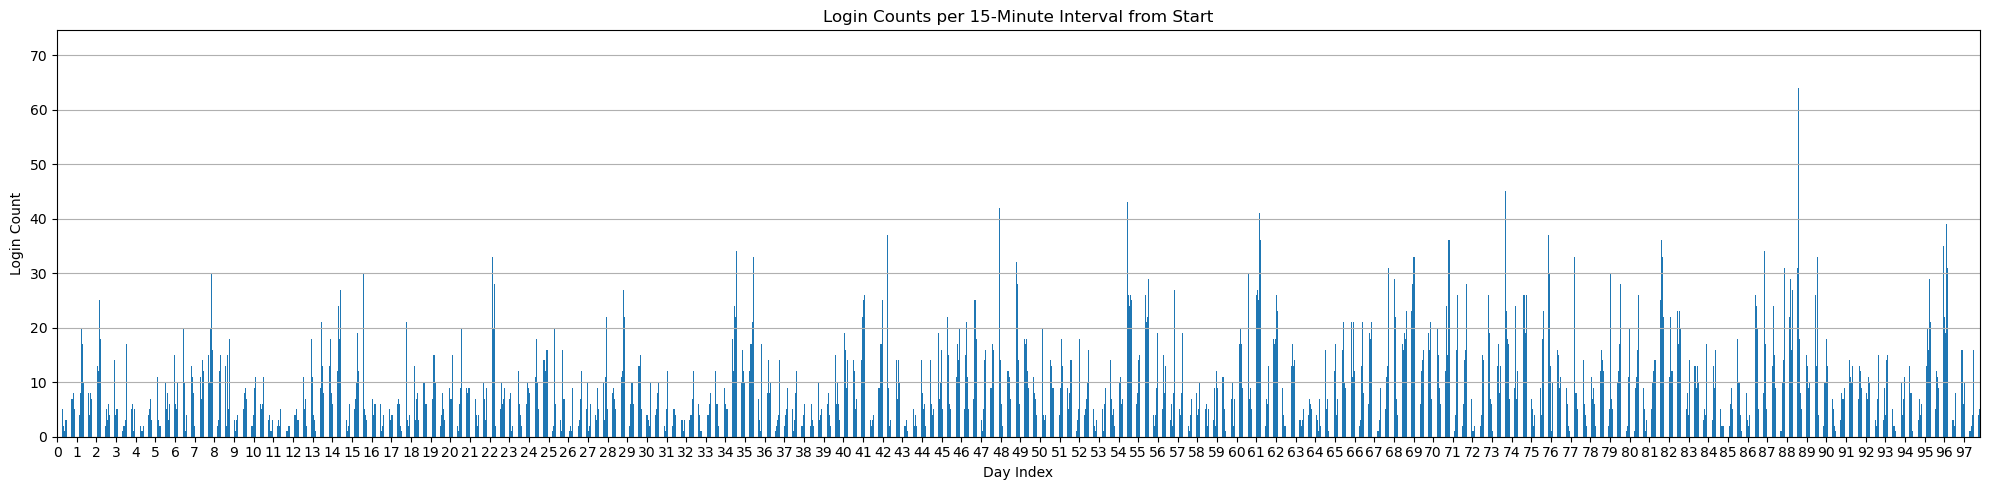

In [22]:
# Plot

tick_positions = np.arange(0, len(login_counts), step=96)  # Every 96 intervals = 1 day
tick_labels = tick_positions // 96  # Label as "Day 0", "Day 1", etc.

plt.figure(figsize=(20, 5))
login_counts.plot(kind='bar')
plt.title('Login Counts per 15-Minute Interval from Start')
plt.xlabel('Day Index')
plt.ylabel('Login Count')
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

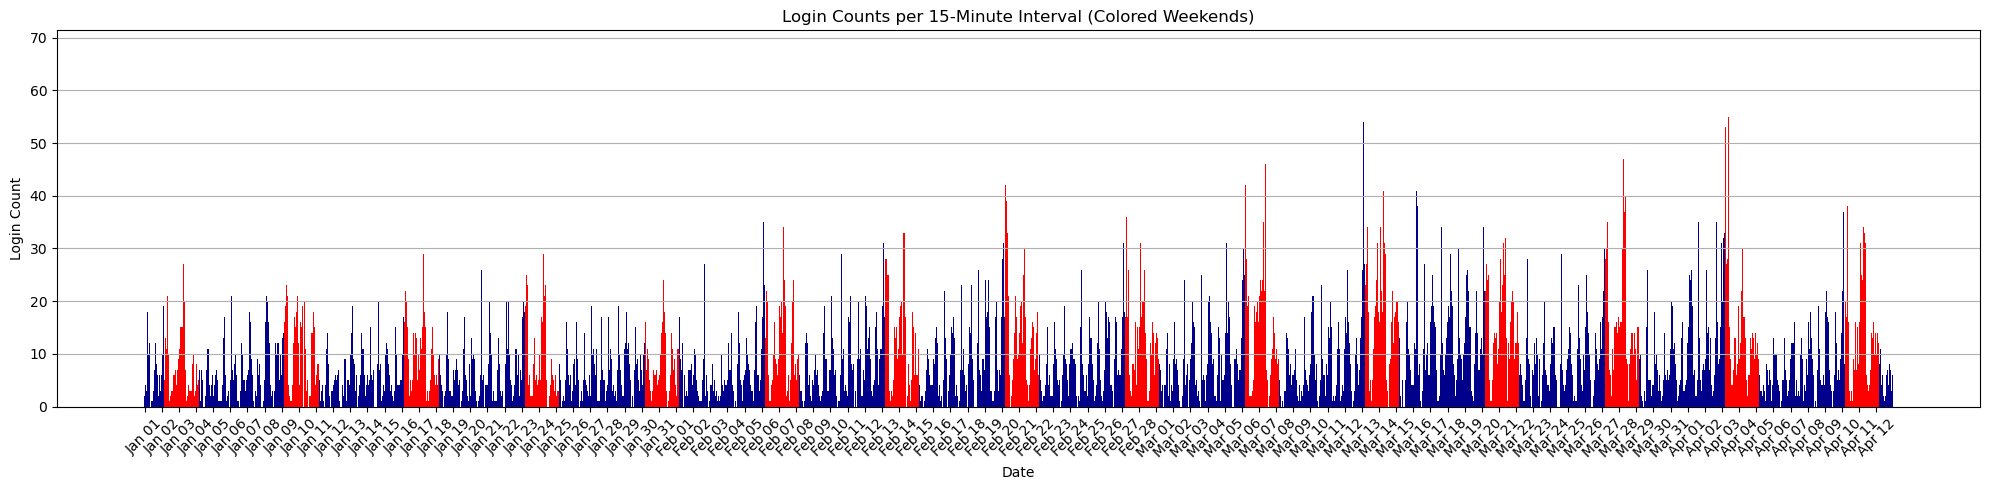

In [ ]:
# Set datetime index
timestamps_1 = timestamps.set_index('login_time', inplace=False)

# Count logins per 15-minute interval
login_counts = timestamps_1.resample('15min').size()

# Reset index to access datetime for labeling and weekend detection
login_counts = login_counts.reset_index()
login_counts.columns = ['time', 'count']

# Create a column for date labels (month-day)
login_counts['label'] = login_counts['time'].dt.strftime('%m-%d %H:%M')

# Identify weekends
login_counts['is_weekend'] = login_counts['time'].dt.weekday >= 5  # Saturday = 5, Sunday = 6

# Plot
plt.figure(figsize=(20, 5))
colors = ['red' if is_weekend else 'skyblue' for is_weekend in login_counts['is_weekend']]

plt.bar(x=range(len(login_counts)), height=login_counts['count'], color=colors, width=1.0)

# Set x-ticks every 96 intervals (once per day)
tick_positions = np.arange(0, len(login_counts), 96)
tick_labels = login_counts.loc[tick_positions, 'time'].dt.strftime('%b %d')

plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.title('Login Counts per 15-Minute Interval (Colored Weekends)')
plt.xlabel('Date')
plt.ylabel('Login Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Visualization--group by actual hour of day

Add additional plot to group login_time by actual hour-of-day:

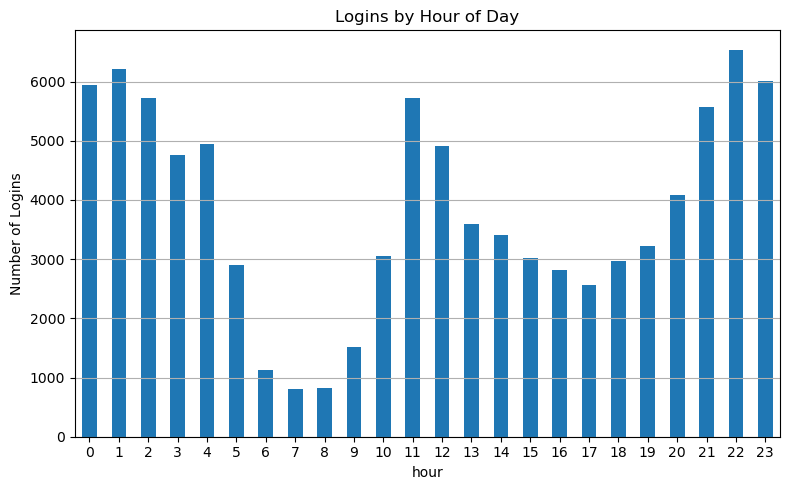

In [24]:
# Plot
timestamps['hour'] = timestamps['login_time'].dt.hour
hour_counts = timestamps.groupby('hour').size()

plt.figure(figsize=(8, 5))
hour_counts.plot(kind='bar')
plt.title("Logins by Hour of Day")
plt.ylabel("Number of Logins")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

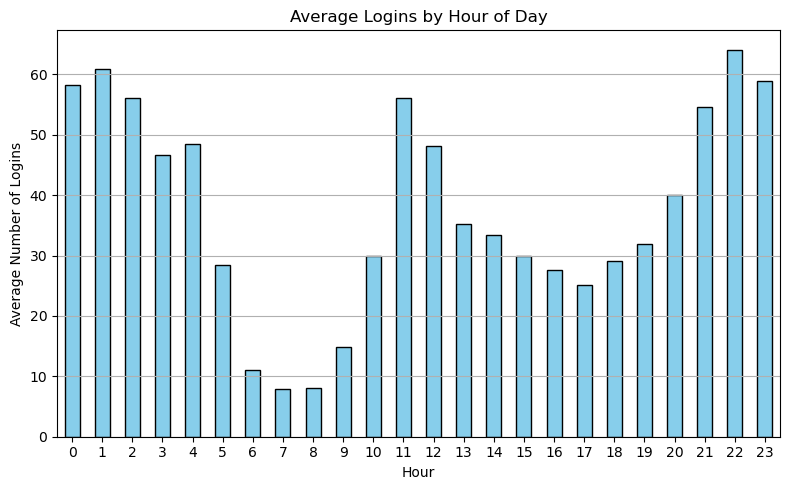

In [25]:
# Extract both date and hour
timestamps['date'] = timestamps['login_time'].dt.date

# Count logins per hour per day
daily_hourly_counts = timestamps.groupby(['date', 'hour']).size().reset_index(name='count')

# Then average over days for each hour
avg_hourly_counts = daily_hourly_counts.groupby('hour')['count'].mean()

# Plot
plt.figure(figsize=(8, 5))
avg_hourly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Logins by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Number of Logins")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Visualization--group by actual day of week

Add additional plot to group login_time by actual day-of-week:

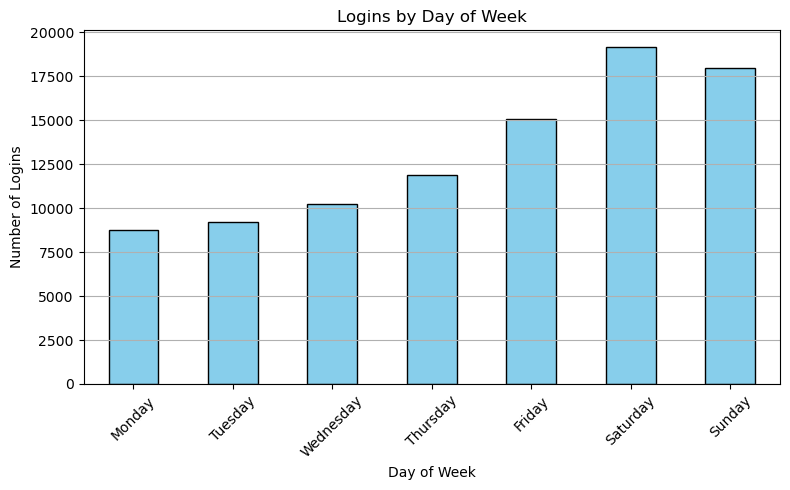

In [26]:
# Add a column for the day of the week (e.g., Monday, Tuesday, etc.)
timestamps['weekday'] = timestamps['login_time'].dt.day_name()

# Group by weekday and count logins
login_counts_by_day = timestamps['weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot
plt.figure(figsize=(8, 5))
login_counts_by_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Logins by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

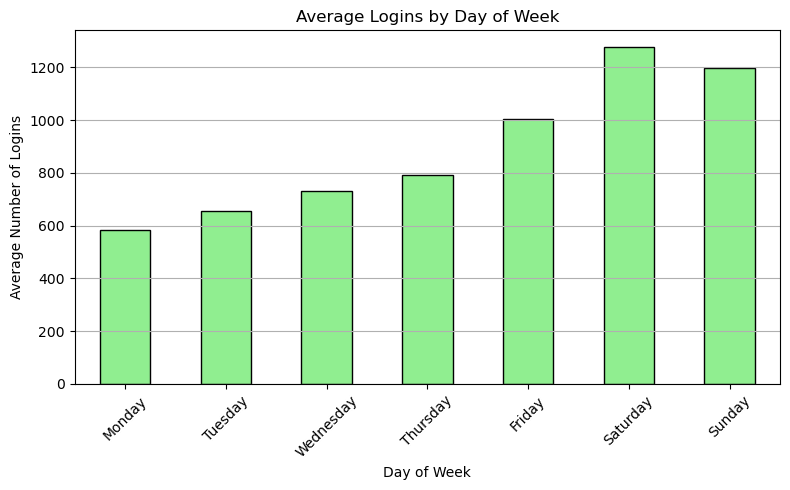

In [27]:

# Count logins per day
daily_counts = timestamps.groupby(['date', 'weekday']).size().reset_index(name='count')

# Average logins by weekday
avg_logins_by_weekday = daily_counts.groupby('weekday')['count'].mean()

# Sort weekdays in correct order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_logins_by_weekday = avg_logins_by_weekday.reindex(ordered_days)

# Plot
plt.figure(figsize=(8, 5))
avg_logins_by_weekday.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Average Logins by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Number of Logins")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Visualization--Rolling average

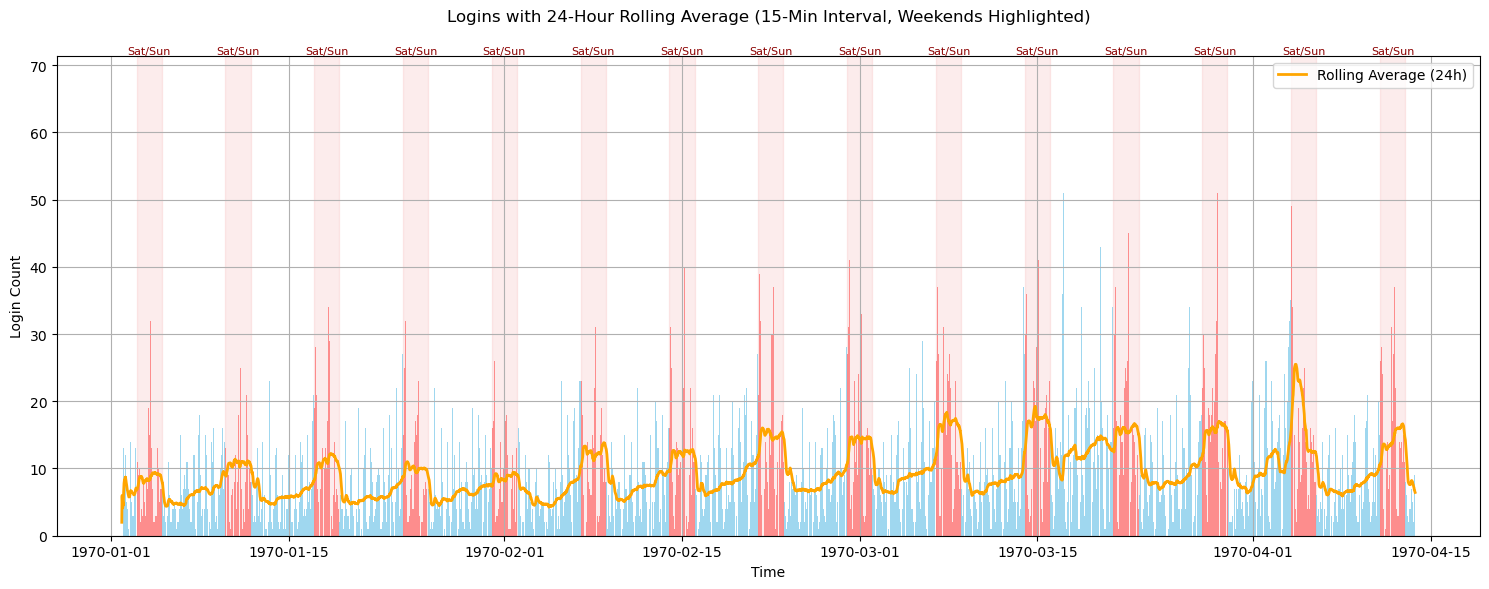

In [44]:
# Set login_time as the index (if you have multiple logins per time, you need to aggregate)
timestamps_2 = timestamps.set_index('login_time', inplace=False)

# Count logins in 15-minute intervals
login_counts = timestamps_2.resample('15min').size()

# Compute rolling average with window size = 96 (i.e., 24 hours if 15-min intervals)
rolling_avg = login_counts.rolling(window=96, min_periods=1).mean()

# Create weekend mask
weekends = login_counts.index.weekday >= 5

# Create bar colors: red for weekends, skyblue for weekdays
bar_colors = ['red' if is_weekend else 'skyblue' for is_weekend in weekends]
bar_alphas = [0.4 if is_weekend else 0.8 for is_weekend in weekends]  # transparent weekends

# Plot
plt.figure(figsize=(15, 6))

# Add shaded background for entire weekends + labels
for i in range(len(login_counts.index) - 1):
    # Detect start of weekend
    if weekends[i] and not weekends[i-1]:  # start of weekend
        start = login_counts.index[i]
    # Detect end of weekend
    if weekends[i] and (i == len(login_counts.index)-1 or not weekends[i+1]):  # end of weekend
        end = login_counts.index[i]
        plt.axvspan(start, end, color='lightcoral', alpha=0.15)
        # Add "Sat/Sun" label at midpoint
        mid_point = start + (end - start) / 2
        plt.text(mid_point, max(login_counts)*1.05, 'Sat/Sun',
                 ha='center', va='bottom', fontsize=8, color='darkred', rotation=0)


# Plot bars for original counts with weekend coloring and transparency
for i, (time, count) in enumerate(zip(login_counts.index, login_counts.values)):
    plt.bar(time, count, color=bar_colors[i], alpha=bar_alphas[i], width=0.01)

# Plot rolling average line
plt.plot(rolling_avg.index, rolling_avg.values, label='Rolling Average (24h)', color='orange', linewidth=2)

plt.title('Logins with 24-Hour Rolling Average (15-Min Interval, Weekends Highlighted)', pad=25)
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Data Quality**
During the analysis, 877 duplicate entries were identified in the `login_time` column, indicating repeated timestamp records that could distort the representation of true user activity if not addressed. Removing these duplicates was performed to ensure accuracy in downstream insights, as they may artificially inflate login counts and distort temporal patterns such as daily peaks or weekend activity.


**Key Observations and Important Features**
Analysis of the login patterns reveals three major trends in demand. First, there is a clear **weekly cycle**, with login activity steadily increasing from Monday to Friday and peaking over the weekend—particularly on Saturdays—suggesting higher engagement during leisure periods. Second, the **daily cycle** shows distinct peaks around midday and late evening, with reduced activity in early morning hours, further reinforcing the idea that logins concentrate during rest times. Finally, there is an apparent **seasonal or climatic influence**, as login volumes rise gradually from January through April, potentially correlating with warmer weather or seasonal events. These patterns—weekly rhythm, daily peaks, and seasonal growth—are important predictors for understanding and forecasting demand.

# Part 2. Experiment and metrics design

**Q1**: What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

**A1**: 
Primary metric. Incremental cross-city peak driver-hours per eligible driver per week—hours a driver is online in the other city during that city’s defined peak. This directly measures the behavior change we want and links to wait times and surge.

**Q2**: Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
- a. how you will implement the experiment;
- b. what statistical test(s) you will conduct to verify the significance of the observation;
- c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**A2**: Experiment. Randomize eligible drivers 1:1 to toll reimbursement vs status quo for 6–8 weeks, stratified by home city and prior crossing. Analyze via Difference-in-Differences on driver-week panels with fixed effects. Track guardrails: % drivers active in both cities, rider wait time, cancel rate, and cost per incremental cross-city peak hour.

Interpretation. If the lift is significant and the cost per incremental hour is acceptable with neutral/better wait times, recommend scale-up (possibly time-gated to peak windows). If effects are heterogeneous, target the most responsive cohorts. Note caveats: spillovers, compliance/contamination, seasonality. 

# Part 3. Predicting modeling

## Load data

In [45]:
riders = pd.read_json(r"C:\Users\Sheng Miao\OneDrive\桌面\SpringBoard\Springboard_MyProjects\Take_home_challenge\ultimate_challenge\ultimate_data_challenge.json")

In [46]:
riders.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [48]:
print(riders.shape)

(50000, 12)


## Data Cleaning

In [49]:
riders.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [50]:
riders.avg_rating_of_driver.unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, nan, 4.5, 4. , 3.9, 4.9, 4.8, 2.5,
       3.7, 1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2,
       2.6, 3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

In [51]:
riders.avg_rating_by_driver.unique()

array([5. , 4.9, 4. , 3. , 4.8, 4.7, 4.5, 4.2, nan, 4.4, 4.6, 3.7, 4.3,
       3.5, 2. , 3.8, 2.5, 4.1, 3.9, 1. , 3.3, 3.4, 3.6, 3.2, 2.3, 2.8,
       1.5, 2.7])

In [52]:
riders.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

In [53]:
riders = riders.copy()

# 1) Indicators for missing ratings
for col in ['avg_rating_of_driver', 'avg_rating_by_driver']:
    riders[col + '_missing'] = riders[col].isna().astype('int8')

# 2) Conditional imputation for ratings
has_trips = riders['trips_in_first_30_days'] > 0
for col in ['avg_rating_of_driver', 'avg_rating_by_driver']:
    median_with_trips = riders.loc[has_trips, col].median()
    # fill NAs among users with trips with the median
    riders.loc[has_trips & riders[col].isna(), col] = median_with_trips
    # fill NAs among users without trips with sentinel 0
    riders.loc[~has_trips & riders[col].isna(), col] = 0.0

# 3) Categorical imputation for phone
riders['phone'] = riders['phone'].fillna('Unknown')


In [54]:
riders.isnull().sum()

city                            0
trips_in_first_30_days          0
signup_date                     0
avg_rating_of_driver            0
avg_surge                       0
last_trip_date                  0
phone                           0
surge_pct                       0
ultimate_black_user             0
weekday_pct                     0
avg_dist                        0
avg_rating_by_driver            0
avg_rating_of_driver_missing    0
avg_rating_by_driver_missing    0
dtype: int64

In [55]:
riders.duplicated().sum()

8

In [56]:
duplicates = riders[riders.duplicated(keep=False)] # keep=False marks all duplicates, not just the later ones
duplicates

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_of_driver_missing,avg_rating_by_driver_missing
116,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0,0,0
332,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0,0,0
2608,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0,0,0
3134,Astapor,1,2014-01-20,5.0,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0,0,0
5958,Winterfell,1,2014-01-18,4.9,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0,1,0
7836,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0,0,0
10624,Winterfell,1,2014-01-18,5.0,1.0,2014-01-19,Android,0.0,False,0.0,3.54,5.0,0,0
14990,Winterfell,1,2014-01-18,4.9,1.0,2014-01-19,iPhone,0.0,True,0.0,1.44,5.0,1,0
18057,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0,0,0
26709,Winterfell,1,2014-01-01,4.9,1.0,2014-01-02,Android,0.0,False,100.0,8.08,5.0,1,0


Since there is no column with unique ID, I cannot be certain whether these are the same person or not. I will Keep them as they may represent different individuals who happen to match on all recorded attributes.

## Create the target variables

I only have a last trip date, not full history. I will create two labels: Retained in last 30 days at pull date and Active in the 6th month on the system.

For “Retained in last 30 days at pull date”, use the snapshot/pull date as the max last_trip_date in the table.

In [58]:
import pandas as pd

riders['signup_date']   = pd.to_datetime(riders['signup_date'])
riders['last_trip_date'] = pd.to_datetime(riders['last_trip_date'])

pull_date = riders['last_trip_date'].max()
riders['retained_30d'] = (riders['last_trip_date'] >= pull_date - pd.Timedelta(days=30)).astype(int)

retention_fraction = riders['retained_30d'].mean()
print(f"Fraction retained (preceding 30 days): {retention_fraction:.3f}")


Fraction retained (preceding 30 days): 0.376


For “Active in the 6th month on the system”, I  would mark a user active between month 5 and month 6 after signup. The last trip fell during month 6.

In [59]:
m6_start = riders['signup_date'] + pd.DateOffset(months=5)  # beginning of 6th month
m6_end   = riders['signup_date'] + pd.DateOffset(months=6)  # beginning of 7th month

# active within 6th-month window
riders['active_m6_strict'] = ((riders['last_trip_date'] >= m6_start) &
                              (riders['last_trip_date'] <  m6_end)).astype(int)

In [60]:
retention_fraction_6m = riders['active_m6_strict'].mean()
print(f"Fraction active in 6th Month: {retention_fraction_6m:.3f}")

Fraction active in 6th Month: 0.245


**Approximately 24.5% of the observed users were retained in the 6th month.**

## EDA

### Univariable distribution

In [106]:
print(riders.columns)

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'avg_rating_of_driver_missing',
       'avg_rating_by_driver_missing', 'retained_30d', 'active_m6_strict'],
      dtype='object')


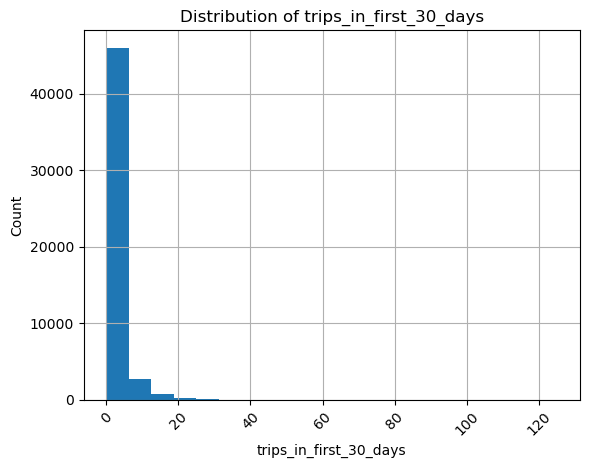

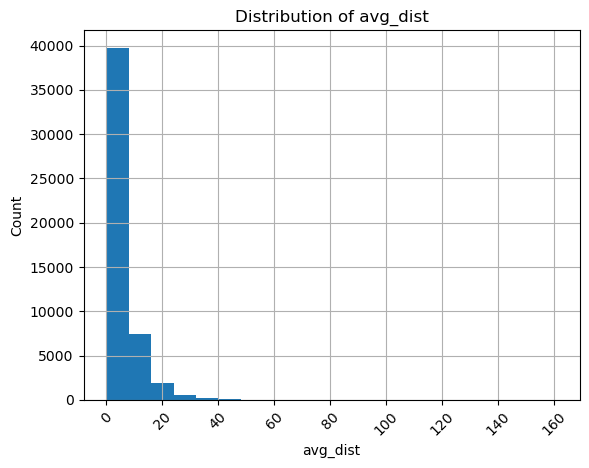

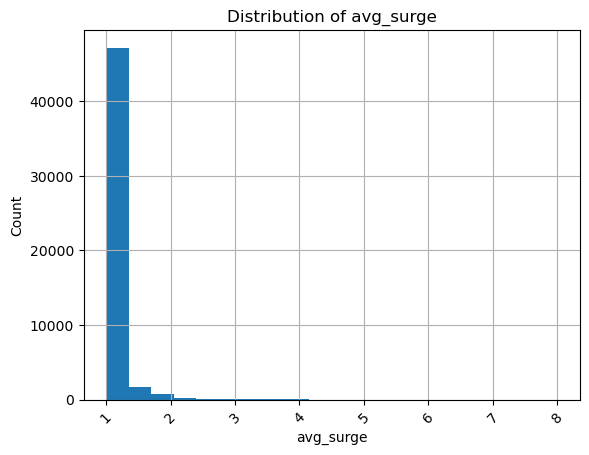

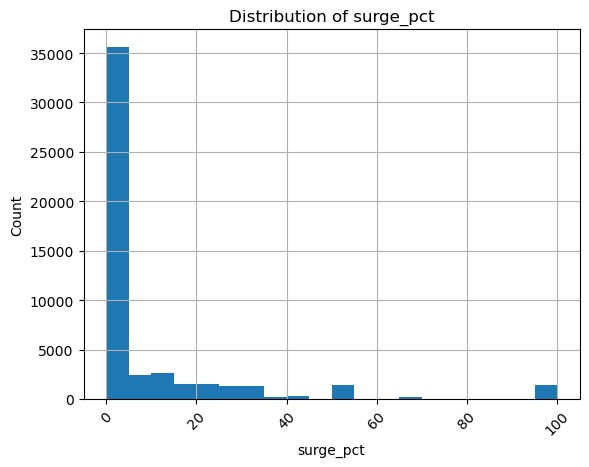

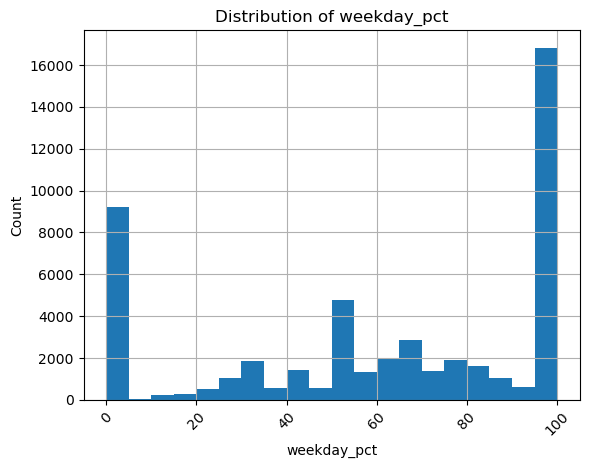

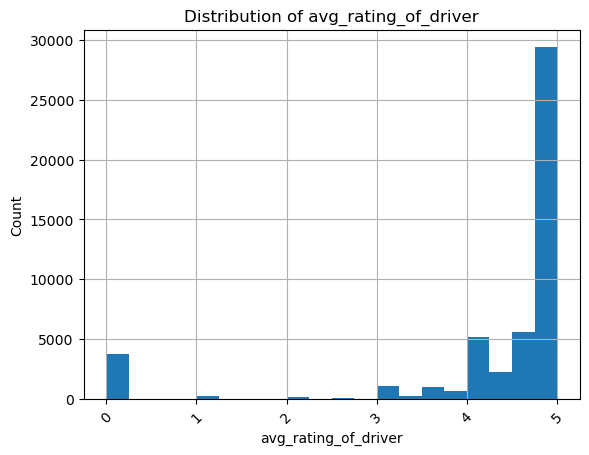

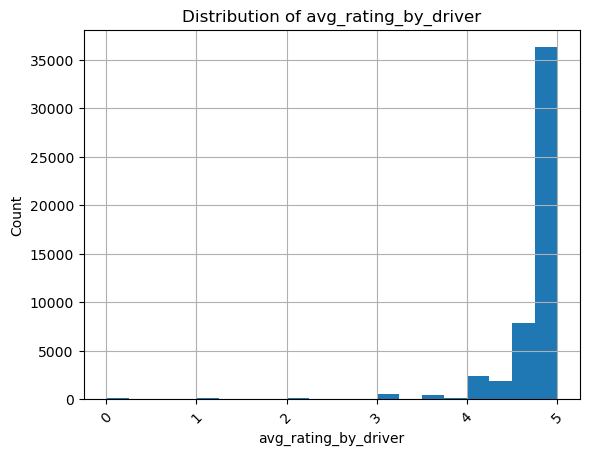

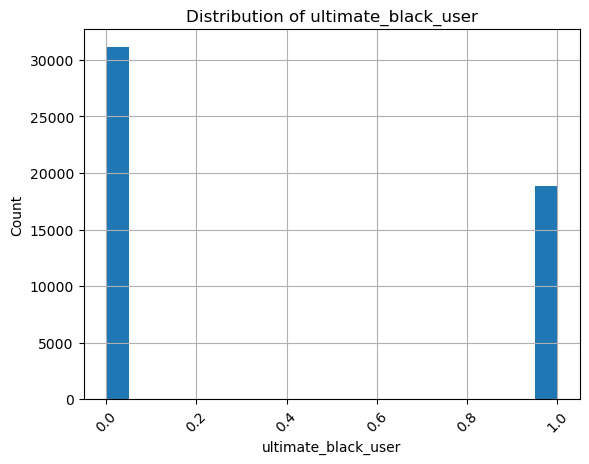

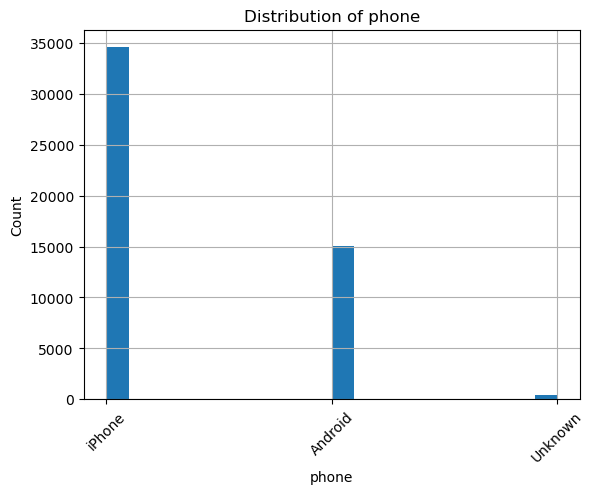

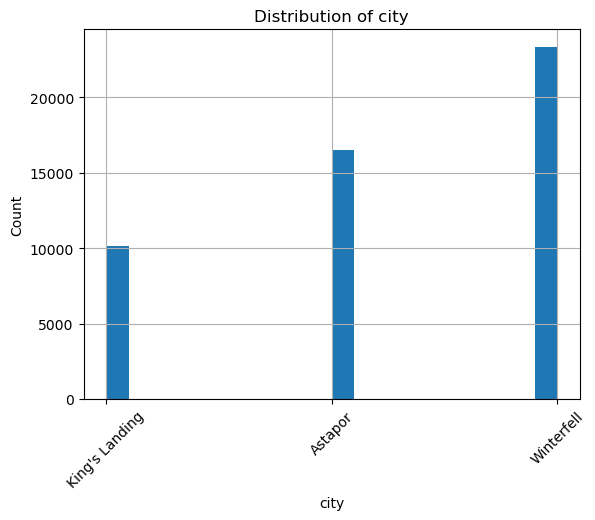

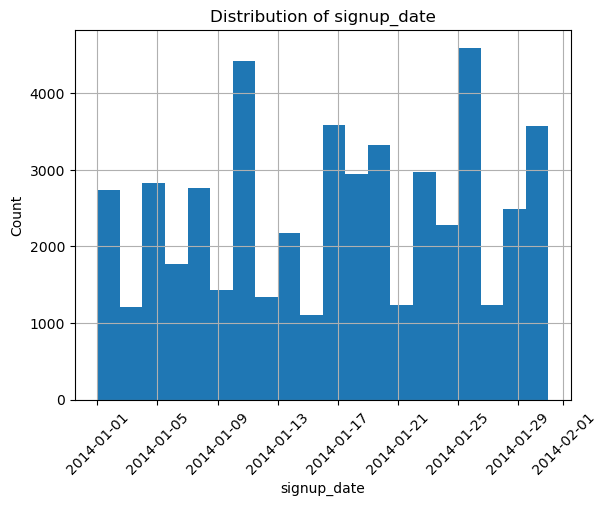

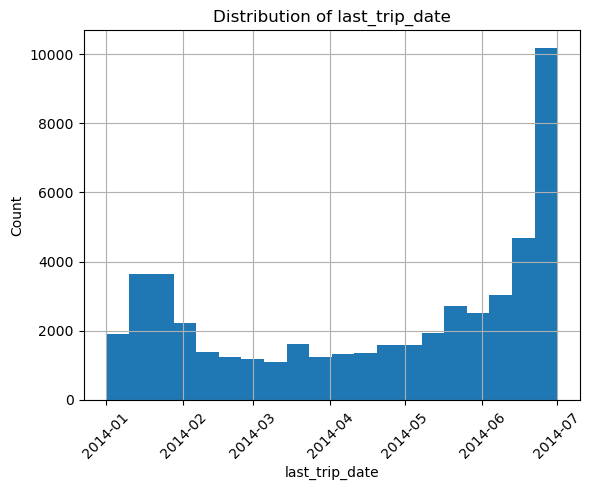

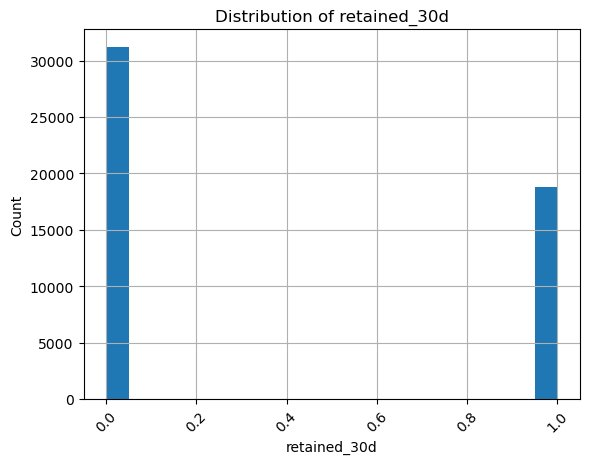

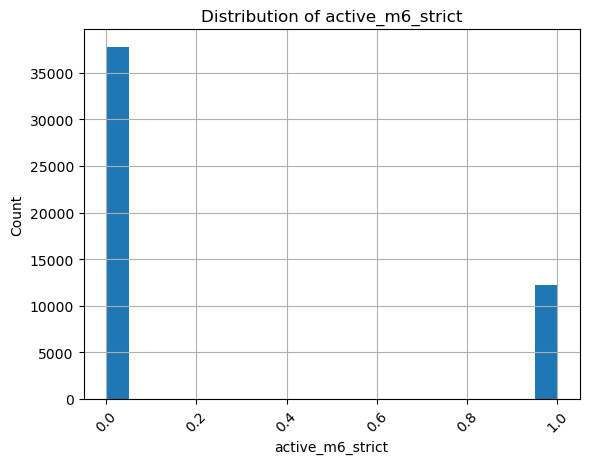

In [70]:
features = ['trips_in_first_30_days','avg_dist','avg_surge','surge_pct','weekday_pct',
            'avg_rating_of_driver','avg_rating_by_driver',
            'ultimate_black_user','phone','city', 'signup_date', 'last_trip_date', 'retained_30d', 'active_m6_strict']

for col in features:
    riders[col].hist(bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

### Bivariable relationship

In [100]:
riders['active_m6_strict'].unique()

array([0, 1])

     phone  active_m6_strict  active_pct
0  Android          0.128944   12.894422
1  Unknown          0.212121   21.212121
2   iPhone          0.295616   29.561622
             city  active_m6_strict  active_pct
0         Astapor          0.164086   16.408613
1  King's Landing          0.399803   39.980257
2      Winterfell          0.234873   23.487316
   ultimate_black_user  active_m6_strict  active_pct
0                    0          0.191068   19.106787
1                    1          0.333775   33.377533


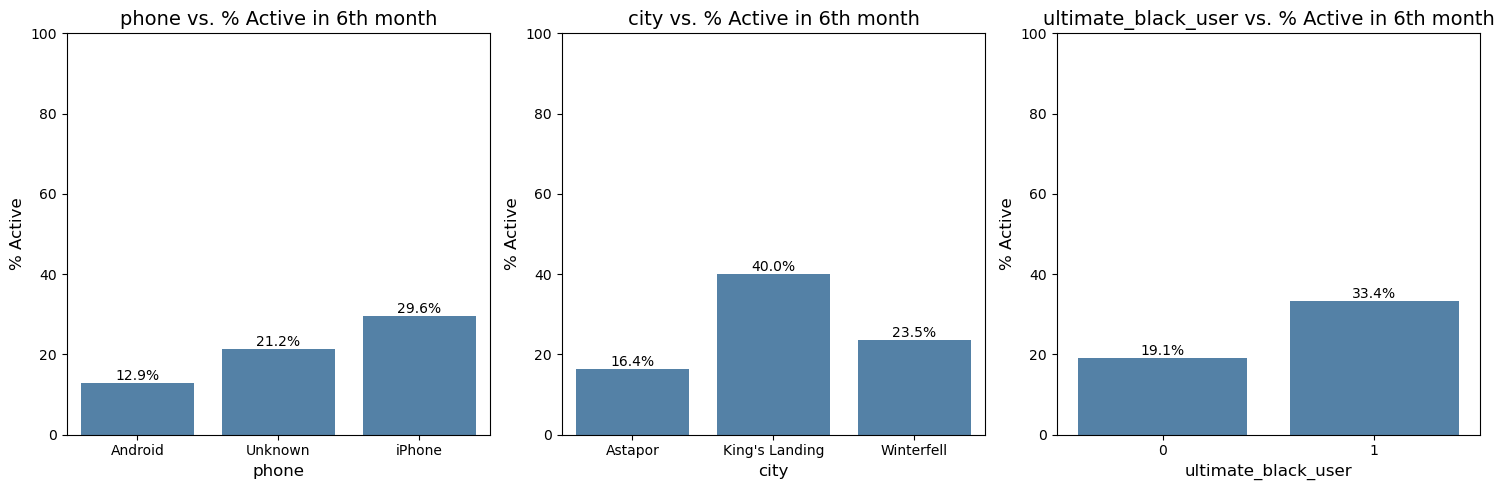

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(['phone', 'city', 'ultimate_black_user']):
    # Calculate percentage of active (1's) per category
    pct_df = (
        riders.groupby(col, observed=True)['active_m6_strict']
        .mean()
        .reset_index()
    )
    pct_df['active_pct'] = pct_df['active_m6_strict'] * 100

    print(pct_df)

    # Plot as bar chart
    sns.barplot(x=col, y='active_pct', data=pct_df, ax=axes[i], color='steelblue')

    axes[i].set_title(f"{col} vs. % Active in 6th month", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('% Active', fontsize=12)
    axes[i].set_ylim(0, 100)  # since it's a percentage

    # Annotate bars with percentage
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.1f}%",
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


The plots reveal strong associations between user characteristics and 6th-month retention. iPhone users were significantly more likely to remain active (29.6%) compared to Android users (12.9%), suggesting a potential link between device type and user engagement. Retention also varied notably by city: King’s Landing had the highest retention rate at 40%, while Astapor had the lowest at 16.4%, indicating possible geographic or market differences. Additionally, users of the premium “Ultimate Black” service showed substantially higher retention (33.4%) than non-premium users (19.1%), highlighting that premium engagement may be a strong predictor of long-term activity.

equal-frequency intervals (different numeric ranges)

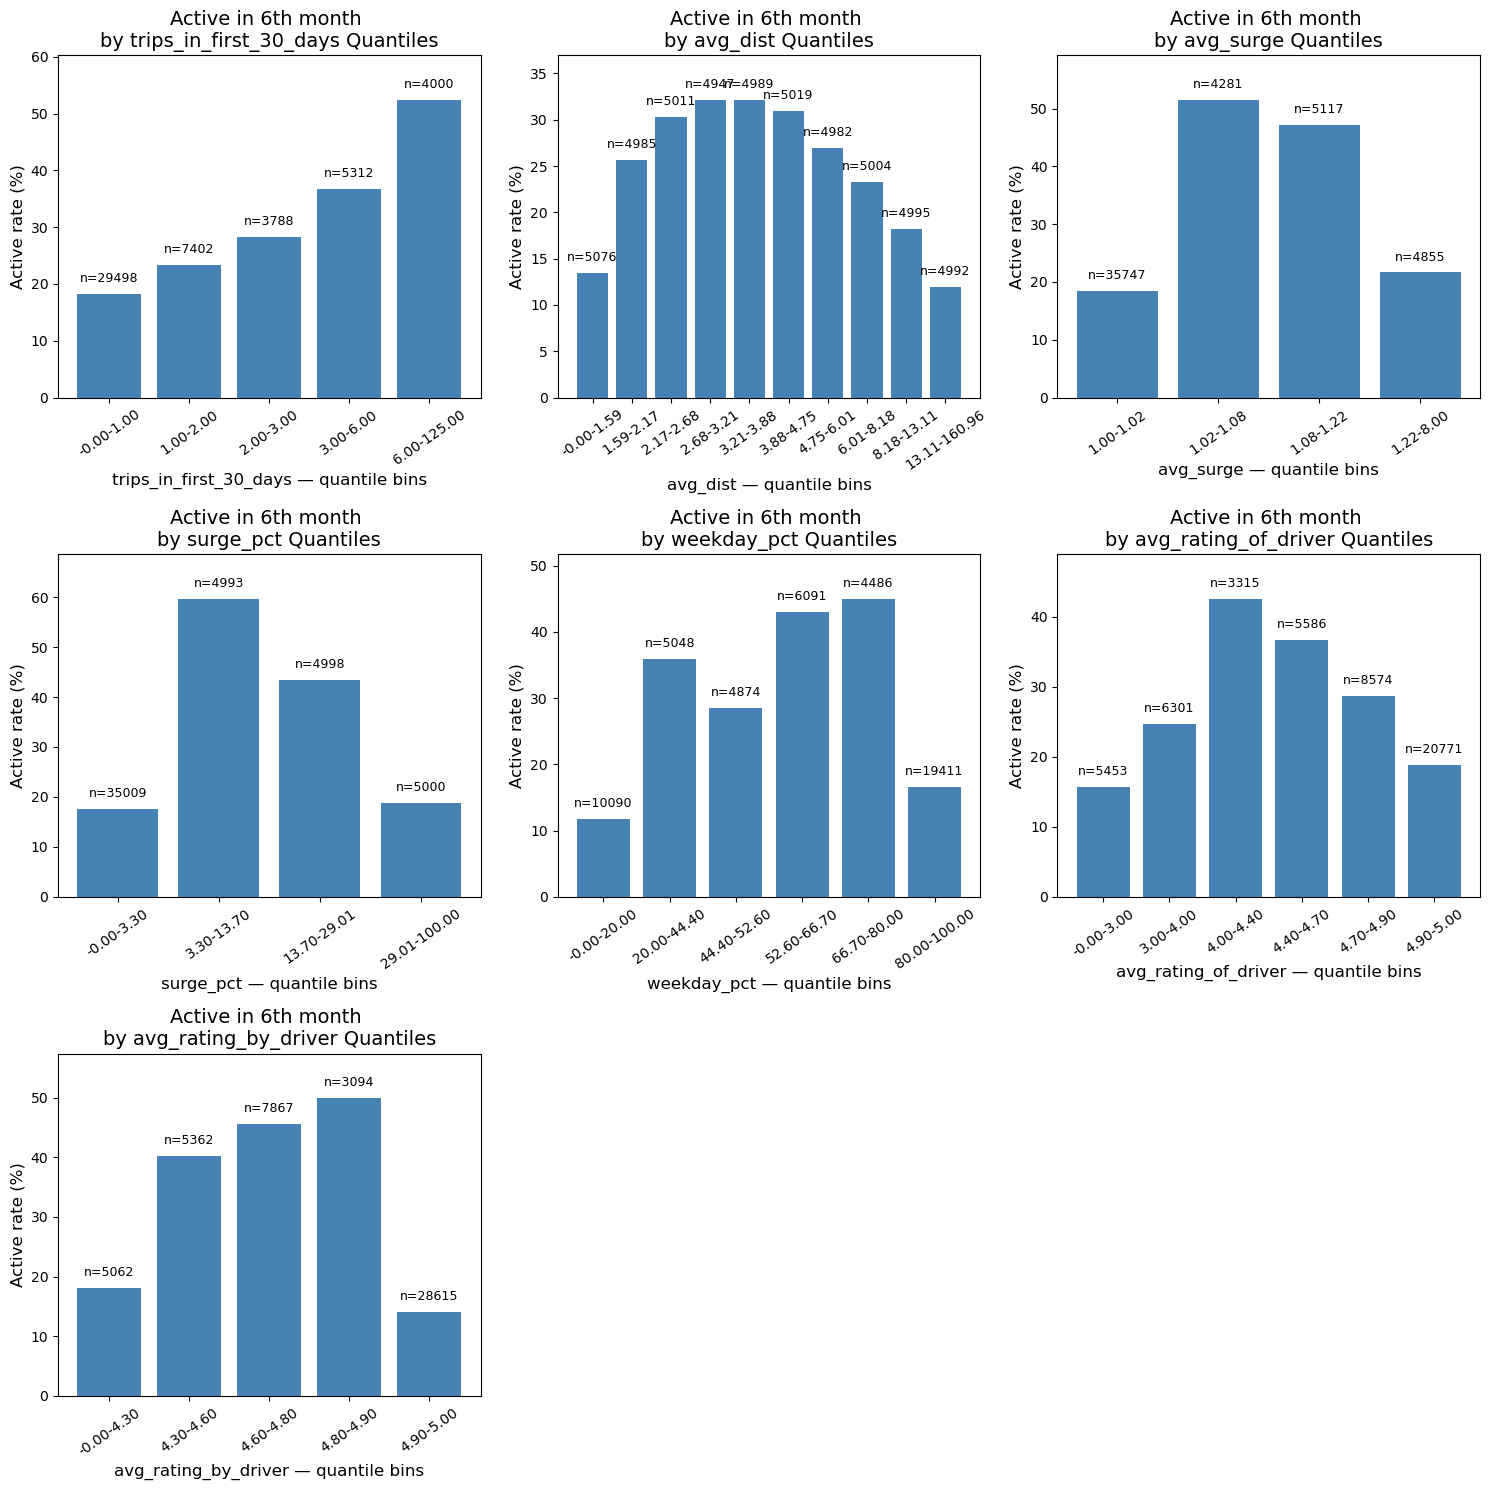

In [105]:
independent_features = ['trips_in_first_30_days','avg_dist', 'avg_surge','surge_pct',
                        'weekday_pct', 'avg_rating_of_driver', 'avg_rating_by_driver']

# ,'avg_rating_by_driver', 'ultimate_black_user'

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
n_bins      = 10                 # e.g., quintiles
i = 0

for col in independent_features:
    # ---- Prep & bucketing ----
    tmp = riders[[col, 'active_m6_strict']].dropna().copy()

    # Create quantile bins; drop duplicates if too many ties
    tmp["icu_len_bin"] = pd.qcut(tmp[col], q=n_bins, duplicates="drop")

    # Rename bin labels, readable labels like "12–36"
    cats   = tmp["icu_len_bin"].cat.categories
    labels = [f"{c.left:.2f}-{c.right:.2f}" for c in cats]
    tmp["icu_len_bin"] = tmp["icu_len_bin"].cat.rename_categories(labels)

    # ---- Aggregate: % readmitted per bin ----
    agg = (
        tmp.groupby("icu_len_bin", observed=True)
        .agg(active_rate=('active_m6_strict', "mean"), n=("icu_len_bin", "size"))
        .reset_index()
        .sort_values("icu_len_bin")
    )
    agg["active_pct"] = agg["active_rate"] * 100

    # ---- Plot ----
    ax = axes[i]
    ax.bar(agg["icu_len_bin"], agg["active_pct"], color='steelblue')
    ax.set_xlabel(f"{col} — quantile bins", fontsize=12)
    ax.set_ylabel("Active rate (%)", fontsize=12)
    ax.set_title(f"Active in 6th month \nby {col} Quantiles", fontsize=14)
    ax.tick_params(axis='x', rotation=35)
    
    # Extend y-limit for text
    ymax = agg["active_pct"].max() * 1.15
    ax.set_ylim(0, ymax)

    # annotate sample size on bars
    for p, (x, pct, n) in enumerate(zip(agg["icu_len_bin"], agg["active_pct"], agg["n"])):
        ax.text(p, pct + agg["active_pct"].max() * 0.03, f"n={n}", ha="center", va="bottom", fontsize=9)

    i += 1

# Remove empty subplots (if any)
for i in range(i, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

equal-width intervals (same numeric range)

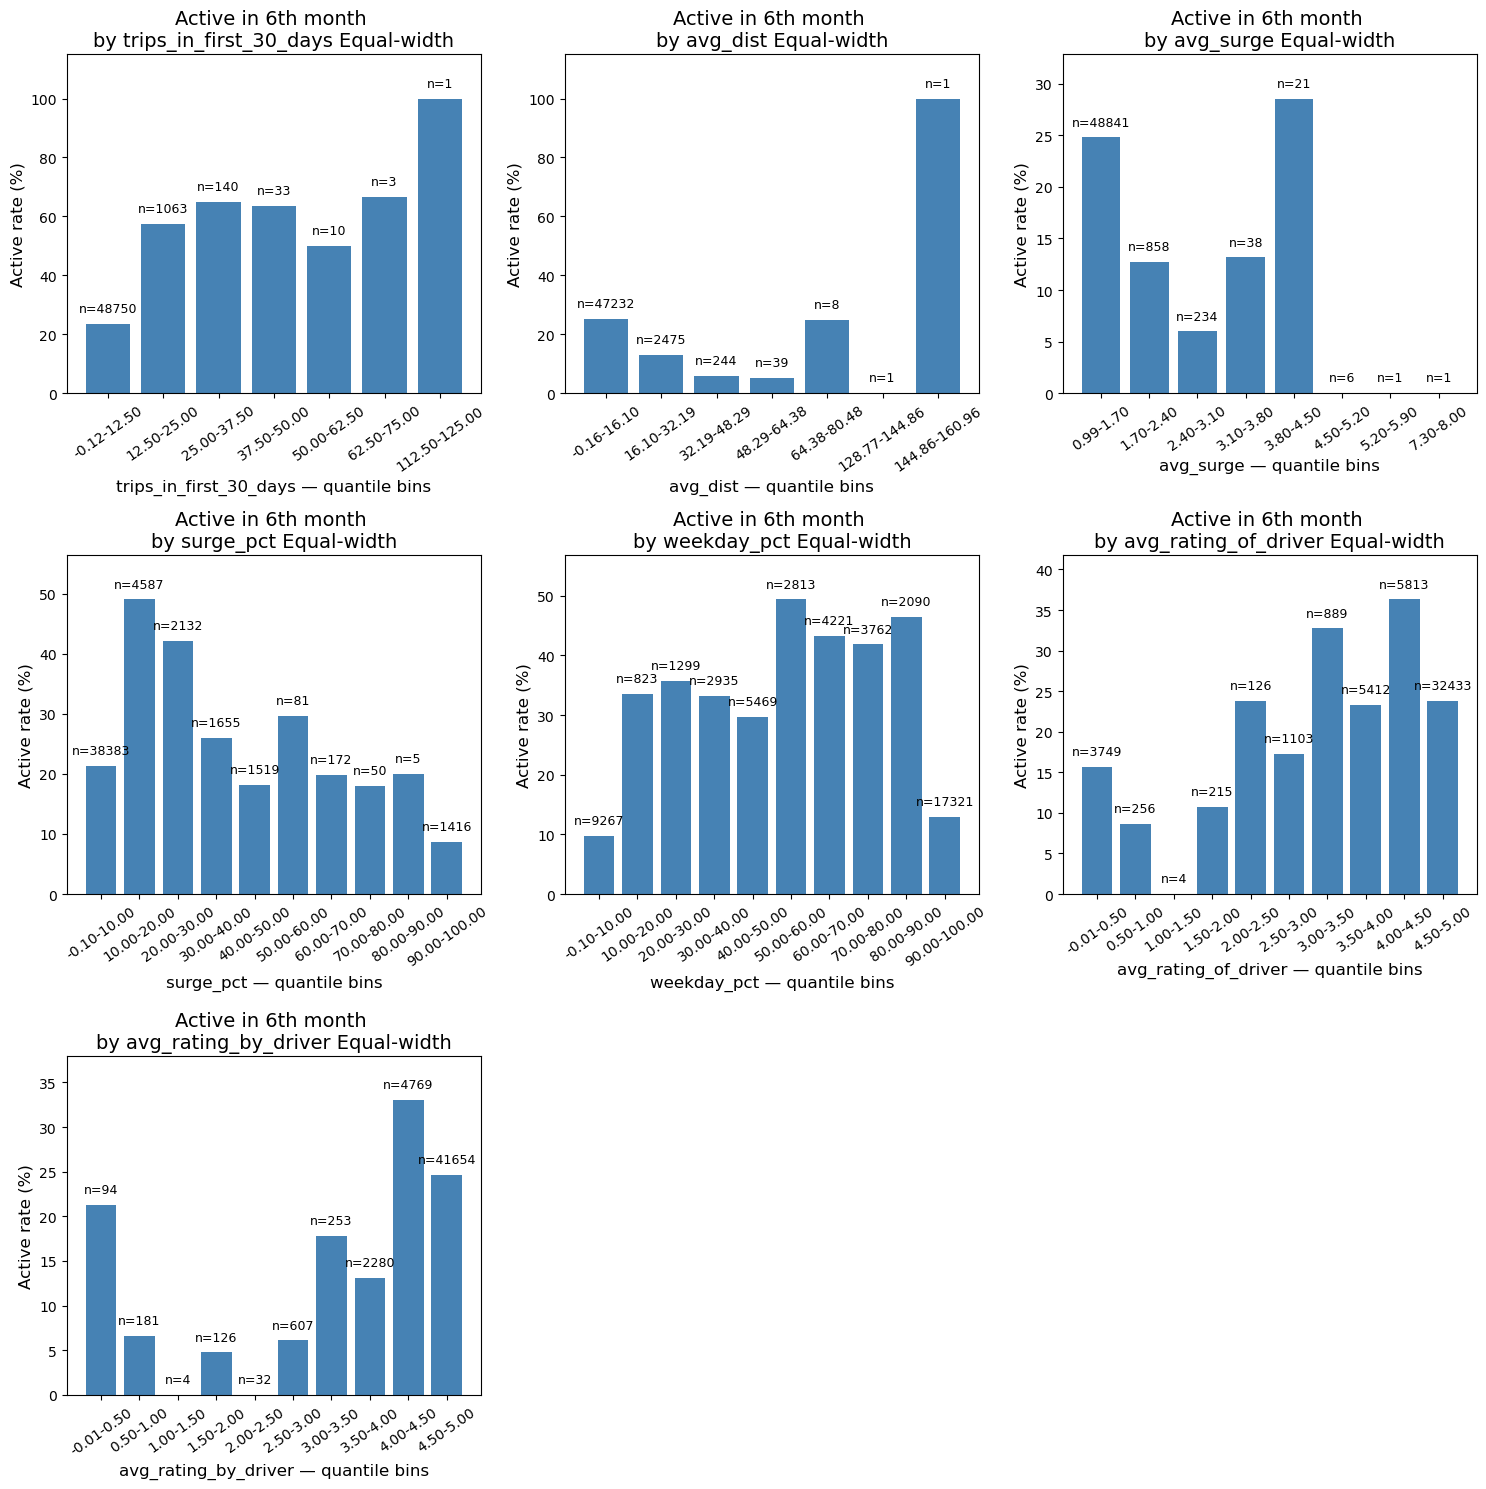

In [104]:
independent_features = ['trips_in_first_30_days','avg_dist', 'avg_surge','surge_pct',
                        'weekday_pct', 'avg_rating_of_driver','avg_rating_by_driver']

# ,'avg_rating_by_driver', 'ultimate_black_user'

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
n_bins      = 10                 # e.g., quintiles
i = 0

for col in independent_features:
    # ---- Prep & bucketing ----
    tmp = riders[[col, 'active_m6_strict']].dropna().copy()

    # Create quantile bins; drop duplicates if too many ties
    tmp["icu_len_bin"] = pd.cut(tmp[col], bins=n_bins)

    # Rename bin labels, readable labels like "12–36"
    cats   = tmp["icu_len_bin"].cat.categories
    labels = [f"{c.left:.2f}-{c.right:.2f}" for c in cats]
    tmp["icu_len_bin"] = tmp["icu_len_bin"].cat.rename_categories(labels)

    # ---- Aggregate: % readmitted per bin ----
    agg = (
        tmp.groupby("icu_len_bin", observed=True)
        .agg(active_rate=('active_m6_strict', "mean"), n=("icu_len_bin", "size"))
        .reset_index()
        .sort_values("icu_len_bin")
    )
    agg["active_pct"] = agg["active_rate"] * 100

    # ---- Plot ----
    ax = axes[i]
    ax.bar(agg["icu_len_bin"], agg["active_pct"], color='steelblue')
    ax.set_xlabel(f"{col} — quantile bins", fontsize=12)
    ax.set_ylabel("Active rate (%)", fontsize=12)
    ax.set_title(f"Active in 6th month \nby {col} Equal-width", fontsize=14)
    ax.tick_params(axis='x', rotation=35)
    
    # Extend y-limit for text
    ymax = agg["active_pct"].max() * 1.15
    ax.set_ylim(0, ymax)

    # annotate sample size on bars
    for p, (x, pct, n) in enumerate(zip(agg["icu_len_bin"], agg["active_pct"], agg["n"])):
        ax.text(p, pct + agg["active_pct"].max() * 0.03, f"n={n}", ha="center", va="bottom", fontsize=9)

    i += 1

# Remove empty subplots (if any)
for i in range(i, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

The visualizations reveal several strong predictors of user retention in the 6th month. Most notably, users who took more trips in their first 30 days had significantly higher retention rates, highlighting early engagement as a key factor. Additionally, Ratings also played a role: both high driver ratings and high rider ratings by drivers were associated with increased retention, indicating that positive experiences on both sides support continued use. 

## Data Preprocessing

In [61]:
print(riders.columns)

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'avg_rating_of_driver_missing',
       'avg_rating_by_driver_missing', 'retained_30d', 'active_m6_strict'],
      dtype='object')


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
import numpy as np

riders['ultimate_black_user'] = riders['ultimate_black_user'].astype('int8')

cat_cols = ['phone','city']

for c in cat_cols:
    riders[c] = riders[c].astype('category')  # LightGBM can take categorical dtype directly

In [107]:
x_features = ['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'phone', 'surge_pct', 'ultimate_black_user', 
 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver_missing', 'avg_rating_by_driver_missing']

X = riders[x_features].copy()
y = riders['active_m6_strict']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling with LightGBM

For this analysis, I select LightGBM as the modeling algorithm due to its high performance with large datasets, native support for categorical features, and ability to handle class imbalance efficiently. Its gradient boosting framework is optimized for speed and memory usage, making it ideal for quick iteration during hyperparameter tuning. I also considered Random Forest for its robustness and interpretability and Logistic Regression as a strong baseline, particularly for evaluating linear separability and feature effects. However, LightGBM consistently outperformed these alternatives in both ROC-AUC and Average Precision (PR-AUC) scores during cross-validation. While model performance was generally strong, one concern lies in the dataset's imbalance in user retention, which introduces risk of inflated accuracy, making precision-recall metrics a more reliable indicator. Key indicators such as a high ROC-AUC (>0.80) and a solid PR-AUC in the context of a rare positive class support the model’s validity. Nonetheless, ongoing evaluation with a held-out test set is essential to ensure generalizability.

In [120]:
from pathlib import Path
import multiprocessing as mp
from typing import Tuple
import numpy as np
import optuna
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    average_precision_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
import matplotlib.pyplot as plt
from optuna.trial import TrialState
from imblearn.over_sampling import RandomOverSampler, SMOTE

# ────────────────────────────────────────────────────────────────────────────────
# GLOBALS
CV_SPLITS = 5
RANDOM_STATE = 42
MAX_PARALLEL_TRIALS = 4

# ────────────────────────────────────────────────────────────────────────────────
def run_lgb_optuna(
    X_train: pd.DataFrame | np.ndarray,
    y_train: pd.Series | np.ndarray,
    *,
    n_trials: int = 100,
    n_optuna_jobs: int | None = None,
    cv: StratifiedKFold | None = None,
    sampler: str | None = None,                 
) -> Tuple[optuna.Study, pd.DataFrame]:

    if cv is None:
        cv = StratifiedKFold(n_splits=CV_SPLITS, shuffle=True, random_state=RANDOM_STATE)

    # Detect categorical columns
    cat_cols = list(X_train.select_dtypes(include=["category"]).columns)

    # Disable sampler if dataset has categorical features
    if sampler is not None and len(cat_cols) > 0:
        print(f"⚠ Detected categorical columns {cat_cols}. Skipping {sampler} to preserve categories.")
        sampler_obj = None
    else:
        if sampler == "ros":
            sampler_obj = RandomOverSampler(sampling_strategy=0.5, random_state=RANDOM_STATE)
        elif sampler == "smote":
            sampler_obj = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=RANDOM_STATE)
        else:
            sampler_obj = None

    def _objective(trial: optuna.Trial) -> float:
        params = {
            "objective": "binary",
            "metric": "average_precision",
            "verbosity": -1,
            "boosting_type": "gbdt",
            "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.2, log=True),
            "num_leaves": trial.suggest_int("num_leaves", 20, 256),
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 30),
            "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0.0, 0.1),
            "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
            "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
            "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
            "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 1.0, log=True),
            "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 1.0, log=True),
            "random_state": RANDOM_STATE,
            "n_jobs": -1,
        }

        pos_weight = (y_train.shape[0] - y_train.sum()) / y_train.sum()
        params.update({"scale_pos_weight": pos_weight})

        ap_scores, precision_scores, recall_scores, roc_auc_scores = [], [], [], []

        for _, (train_idx, valid_idx) in enumerate(cv.split(X_train, y_train)):
            X_tr = X_train.iloc[train_idx] if hasattr(X_train, 'iloc') else X_train[train_idx]
            y_tr = y_train.iloc[train_idx] if hasattr(y_train, 'iloc') else y_train[train_idx]
            X_val = X_train.iloc[valid_idx] if hasattr(X_train, 'iloc') else X_train[valid_idx]
            y_val = y_train.iloc[valid_idx] if hasattr(y_train, 'iloc') else y_train[valid_idx]

            if sampler_obj:
                X_tr, y_tr = sampler_obj.fit_resample(X_tr, y_tr)

            dtrain = lgb.Dataset(X_tr, label=y_tr, categorical_feature=cat_cols if len(cat_cols) > 0 else None)
            dvalid = lgb.Dataset(X_val, label=y_val, reference=dtrain, categorical_feature=cat_cols if len(cat_cols) > 0 else None)

            bst = lgb.train(
                params,
                dtrain,
                num_boost_round=1000,
                valid_sets=[dvalid],
                valid_names=['valid'],
                callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)],
            )

            y_prob = bst.predict(X_val)
            y_pred = (y_prob >= 0.5).astype(int)

            if y_val.sum() == 0:
                raise optuna.exceptions.TrialPruned("No positives in valid fold")

            ap_scores.append(average_precision_score(y_val, y_prob, pos_label=1))
            precision_scores.append(precision_score(y_val, y_pred, zero_division=0, pos_label=1))
            recall_scores.append(recall_score(y_val, y_pred, zero_division=0, pos_label=1))
            roc_auc_scores.append(roc_auc_score(y_val, y_prob))

        mean_ap = np.mean(ap_scores)
        trial.set_user_attr("ap", mean_ap)
        trial.set_user_attr("precision", np.mean(precision_scores))
        trial.set_user_attr("recall", np.mean(recall_scores))
        trial.set_user_attr("roc_auc", np.mean(roc_auc_scores))
        trial.set_user_attr("lambda_l1", params["lambda_l1"])
        trial.set_user_attr("lambda_l2", params["lambda_l2"])
        return mean_ap

    if n_optuna_jobs is None:
        n_optuna_jobs = min(MAX_PARALLEL_TRIALS, mp.cpu_count())

    study = optuna.create_study(direction="maximize")
    study.optimize(
        _objective,
        n_trials=n_trials,
        show_progress_bar=True,
        n_jobs=n_optuna_jobs,
    )

    def _penalty(l1: float, l2: float, tol: float = 1e-12) -> str:
        if l1 > tol and l2 < tol:
            return "L1"
        if l2 > tol and l1 < tol:
            return "L2"
        if l1 > tol and l2 > tol:
            return "ElasticNet"
        return "None"
    
    completed = [t for t in study.trials if t.state == TrialState.COMPLETE]
    if not completed:
        raise ValueError("No completed trials with valid scores")

    results = pd.DataFrame({
        "trial": [t.number for t in study.trials],
        "ap": [t.user_attrs["ap"] for t in study.trials],
        "precision": [t.user_attrs["precision"] for t in study.trials],
        "recall": [t.user_attrs["recall"] for t in study.trials],
        "roc_auc": [t.user_attrs["roc_auc"] for t in study.trials],
        "lambda_l1": [t.user_attrs["lambda_l1"] for t in study.trials],
        "lambda_l2": [t.user_attrs["lambda_l2"] for t in study.trials],
    })
    results["penalty"] = results.apply(lambda r: _penalty(r.lambda_l1, r.lambda_l2), axis=1)

    _plot_metric_bars(results)
    return study, results

def _plot_metric_bars(results: pd.DataFrame) -> None:
    metrics1 = ["ap", "precision", "recall"]
    grouped1 = results.groupby("penalty")[metrics1].mean().rename(columns={
        "ap": "Avg Precision",
        "precision": "Precision",
        "recall": "Recall"
    }).sort_values("Avg Precision", ascending=False)

    ax1 = grouped1.plot(kind="bar", figsize=(10, 6))
    ax1.set_title("Penalties - Average Precision, Precision, Recall")
    ax1.set_ylabel("Score")
    ax1.figure.tight_layout()
    plt.show()

    grouped2 = results.groupby("penalty")[["roc_auc"]].mean().rename(columns={"roc_auc": "ROC AUC"})
    grouped2 = grouped2.sort_values("ROC AUC", ascending=False)
    ax2 = grouped2.plot(kind="bar", figsize=(10, 6), legend=True)
    ax2.set_title("Penalties - ROC AUC")
    ax2.set_ylabel("Score")
    ax2.figure.tight_layout()
    plt.show()


[I 2025-08-06 15:12:12,602] A new study created in memory with name: no-name-a6bed279-d1a3-4736-80c9-0fb3d6d226c1


⚠ Detected categorical columns ['city', 'phone']. Skipping smote to preserve categories.


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-08-06 15:12:15,944] Trial 1 finished with value: 0.5851387088084392 and parameters: {'learning_rate': 0.13011696366076098, 'num_leaves': 51, 'max_depth': 14, 'min_data_in_leaf': 14, 'min_gain_to_split': 0.021696741664300426, 'feature_fraction': 0.9796263445216131, 'bagging_fraction': 0.5795022538972645, 'bagging_freq': 9, 'lambda_l1': 0.06281339481660397, 'lambda_l2': 6.731782486535348e-06}. Best is trial 1 with value: 0.5851387088084392.
[I 2025-08-06 15:12:16,783] Trial 2 finished with value: 0.5876478978720705 and parameters: {'learning_rate': 0.15955334223273487, 'num_leaves': 149, 'max_depth': 3, 'min_data_in_leaf': 10, 'min_gain_to_split': 0.008231885998057254, 'feature_fraction': 0.8632091526082795, 'bagging_fraction': 0.5516904085510512, 'bagging_freq': 6, 'lambda_l1': 2.5913704297264652e-08, 'lambda_l2': 0.08256299691227852}. Best is trial 2 with value: 0.5876478978720705.
[I 2025-08-06 15:12:18,140] Trial 3 finished with value: 0.583335940316439 and parameters: {'lear

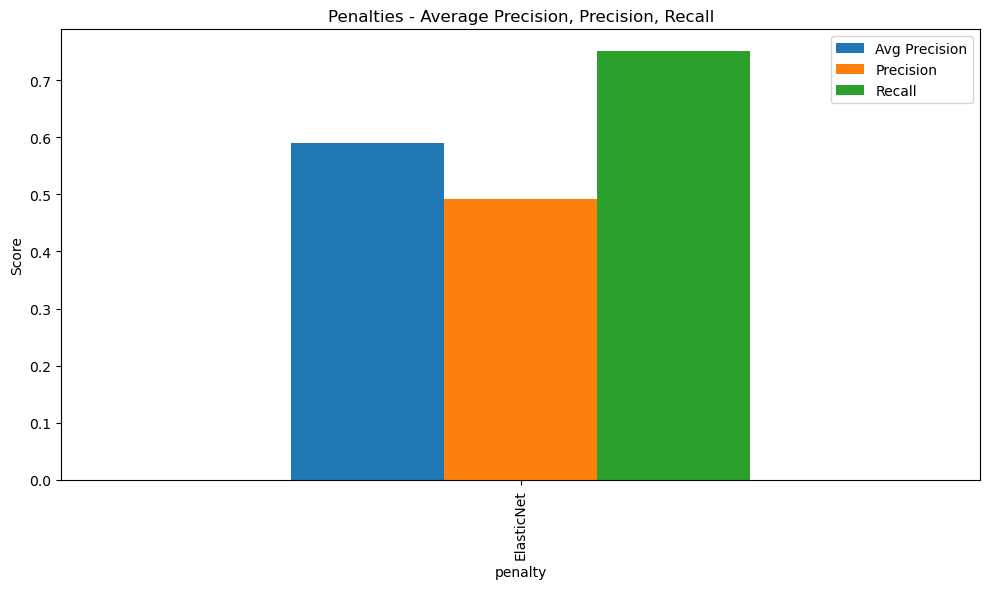

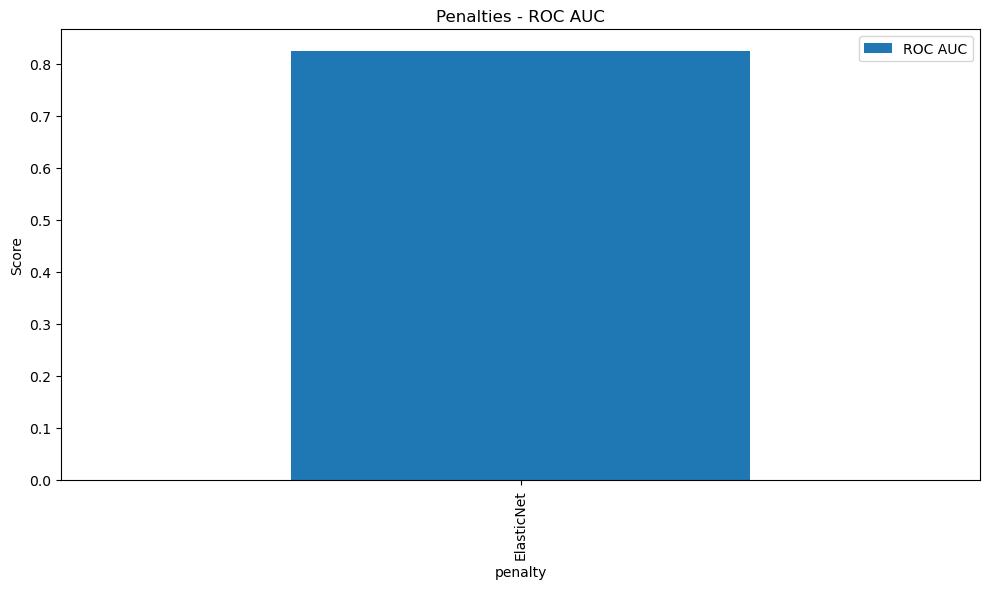

    trial        ap  precision    recall   roc_auc     lambda_l1  lambda_l2  \
39     39  0.593154   0.490009  0.757675  0.826360  2.911430e-02   0.000323   
58     58  0.593143   0.490447  0.757369  0.826121  5.111165e-08   0.066447   
34     34  0.592626   0.488121  0.756958  0.825929  5.139078e-03   0.176776   
76     76  0.592603   0.489447  0.757982  0.826507  9.662009e-01   0.015440   
38     38  0.592546   0.488605  0.758187  0.826324  1.006148e-08   0.126815   

       penalty  
39  ElasticNet  
58  ElasticNet  
34  ElasticNet  
76  ElasticNet  
38  ElasticNet  


In [121]:
# --- OPTUNA LIGHTGBM TUNING ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
study, results = run_lgb_optuna(
    X_train,
    y_train,
    sampler="smote",
    cv=cv,
    n_trials=100
)

print(results.sort_values("ap", ascending=False).head())

## Precision recall thresholding curve for the best model

Determine best_iteration via early stopping on a validation set,

In [ ]:
import lightgbm as lgb

# Extract best params
best_params = study.best_params.copy()

# Add fixed parameters needed by LightGBM
best_params.update({
    "objective": "binary",
    "metric": "average_precision",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": RANDOM_STATE,
    "n_jobs": -1,
    "scale_pos_weight": (y_train.shape[0] - y_train.sum()) / y_train.sum()
})

# Split train data into training + validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Detect categorical columns (optional if already known)
cat_cols = list(X_train.select_dtypes(include=["category"]).columns)

# Create LightGBM datasets
dtrain = lgb.Dataset(X_train_sub, label=y_train_sub, categorical_feature=cat_cols)
dvalid = lgb.Dataset(X_val, label=y_val, reference=dtrain, categorical_feature=cat_cols)

# Train with early stopping on validation set
early_model = lgb.train(
    best_params,
    dtrain,
    valid_sets=[dtrain, dvalid],
    valid_names=["train", "valid"],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(50),
        lgb.log_evaluation(100)
    ]
)

# Best iteration
best_iteration = early_model.best_iteration
print(f"Best iteration: {best_iteration}")


Training until validation scores don't improve for 50 rounds
[100]	train's average_precision: 0.603818	valid's average_precision: 0.592612
[200]	train's average_precision: 0.62672	valid's average_precision: 0.600265
[300]	train's average_precision: 0.638635	valid's average_precision: 0.601108
Early stopping, best iteration is:
[307]	train's average_precision: 0.639324	valid's average_precision: 0.601894
Best iteration: 307


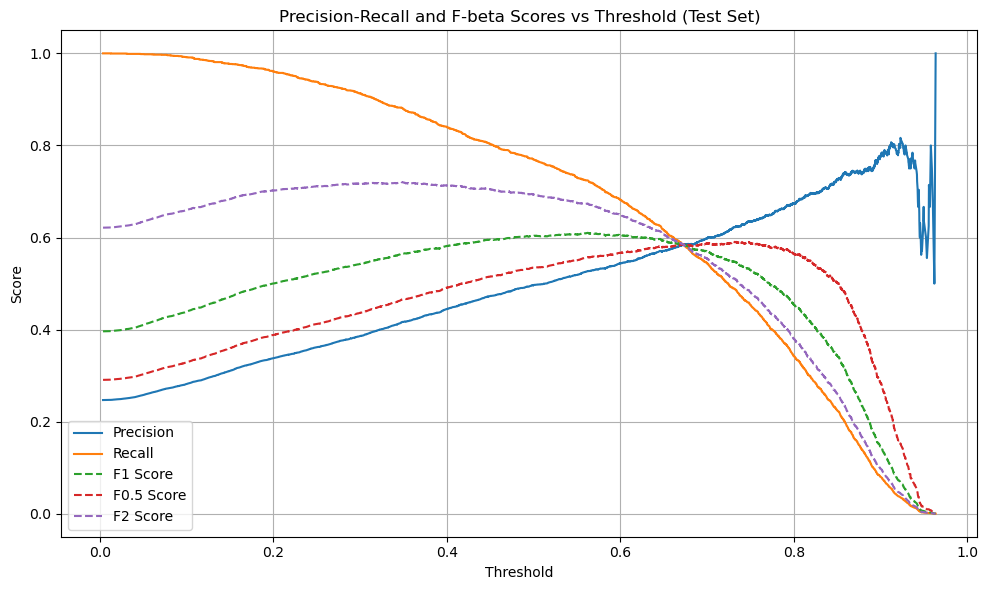

In [128]:
from sklearn.metrics import precision_recall_curve

# Retrain final model on full X_train with best_iteration
dtrain_full = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_cols)

final_model = lgb.train(
    best_params,
    dtrain_full,
    num_boost_round=best_iteration,
)

# Predict probabilities on held-out test set
y_prob = final_model.predict(X_test)

# STEP 9: Precision–Recall Threshold Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute F-beta scores
def compute_fbeta(precision, recall, beta):
    beta_sq = beta ** 2
    return (1 + beta_sq) * (precision * recall) / (beta_sq * precision + recall + 1e-10)

# Remove last point in thresholds to match precision/recall length
thresholds = thresholds  # already computed
precision = precision[:-1]
recall = recall[:-1]

f1_scores = compute_fbeta(precision, recall, beta=1.0)
f05_scores = compute_fbeta(precision, recall, beta=0.5)
f2_scores = compute_fbeta(precision, recall, beta=2.0)

# Plot everything
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.plot(thresholds, f1_scores, label="F1 Score", linestyle="--")
plt.plot(thresholds, f05_scores, label="F0.5 Score", linestyle="--")
plt.plot(thresholds, f2_scores, label="F2 Score", linestyle="--")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall and F-beta Scores vs Threshold (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The chart illustrates how precision, recall, and F-beta scores (F1, F0.5, F2) vary across classification thresholds on the test set. As expected, precision increases while recall decreases with higher thresholds, revealing the trade-off between capturing more positives (recall) and reducing false positives (precision). The F1 score, which balances both, peaks around a threshold of 0.55–0.60, suggesting an optimal threshold in this range. F0.5 (favoring precision) and F2 (favoring recall) reach their respective peaks slightly lower and higher than F1, reflecting their bias toward one metric. This analysis helps identify the best threshold for the model based on the desired balance between precision and recall, depending on the specific business objective or cost of false predictions.

## SHAP analysis

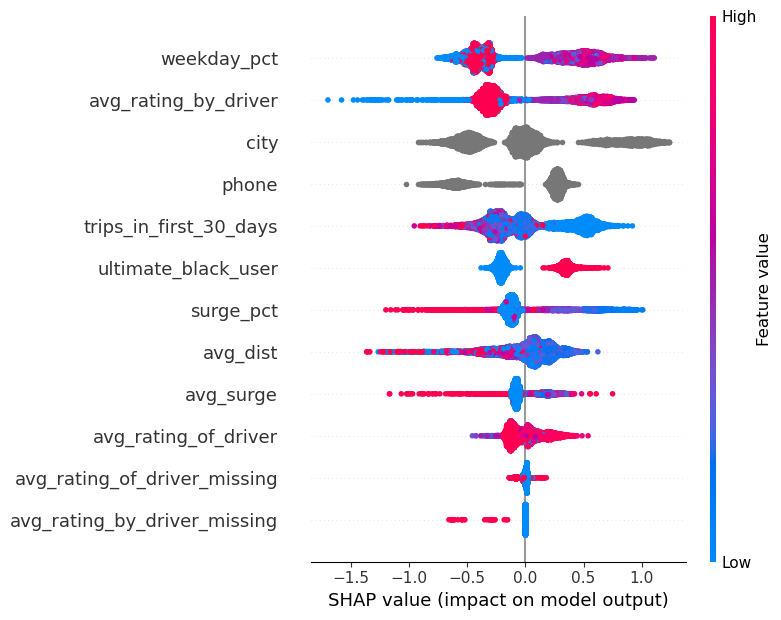

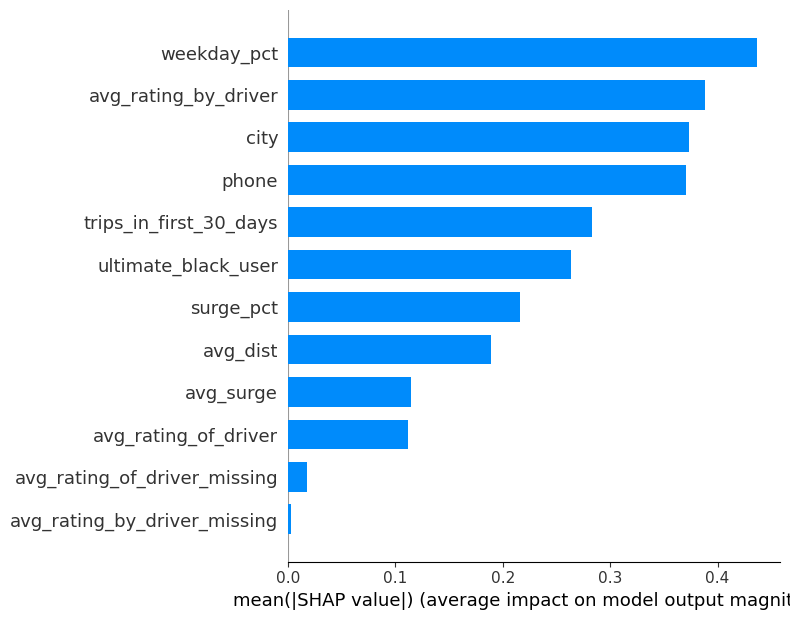

In [129]:
import shap

# Initialize SHAP explainer for LightGBM
explainer = shap.Explainer(final_model)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Beeswarm plot (summary)
shap.summary_plot(shap_values, X_test, plot_type="dot")

# Bar plot of mean(|SHAP|)
shap.summary_plot(shap_values, X_test, plot_type="bar")


The SHAP summary plot illustrates the relative impact of each feature on the model's prediction of 6-month user retention. weekday_pct and avg_rating_by_driver are the most influential features, with higher values (in red) generally pushing the model toward a higher likelihood of retention. Categorical variables such as city and phone also carry strong predictive power. Interestingly, trips_in_first_30_days, surge_pct, and avg_surge all show predominantly negative SHAP values even when their feature values are high (in red), indicating that high values for these variables are associated with lower retention. This suggests that early heavy usage and frequent exposure to surge pricing may reflect user behavior patterns that do not sustain long-term engagement. Overall, the plot highlights that not all intuitively positive behaviors (like early activity) lead to retention, emphasizing the complexity of user engagement dynamics

Ultimate can leverage the model insights to target retention strategies more effectively. For example, since lower retention is associated with high surge exposure and high early usage, the company could offer personalized discounts or loyalty rewards to heavily engaged new users during their first month. Additionally, promoting high-quality driver interactions—reflected by higher ratings from and for drivers—could improve user satisfaction and encourage long-term use. Identifying at-risk users early based on these patterns enables proactive outreach, such as timely incentives or tailored communication.